# Hands on ML chapter 4

## Introduction

Chapter 4 of Hands-On Machine Learning focuses on the fundamentals of training machine learning models. It covers key concepts such as linear regression, gradient descent optimization, hyperparameter tuning, and strategies to handle overfitting and underfitting. The chapter emphasizes both mathematical understanding and practical implementation, providing essential knowledge for building and optimizing machine learning models.

## Linear Regression

oneof the simplest models there is. We will discuss two very different ways to train it:

* direct closed form equation ( Y = a + bx ) -> Determine a , b

* Iterative Gradient Descent

### General Form

Y = a0 + a1X1 + a2X2 + a3X3 + ... + anXn ,**Where a0 is the bias term and (a1, a2, a3, ..., an) are the features weights**

Vectorized Form:

Y = ha(X) = a . X

**we first need a measure of how well (or poorly) the model fits the training data, So we calculate MSE (Mean Square Error)**

### The Normal Equation

To find regression parameters we use: a(vector) = inverse((X(transpose) . X)) . X(transpose) . Y

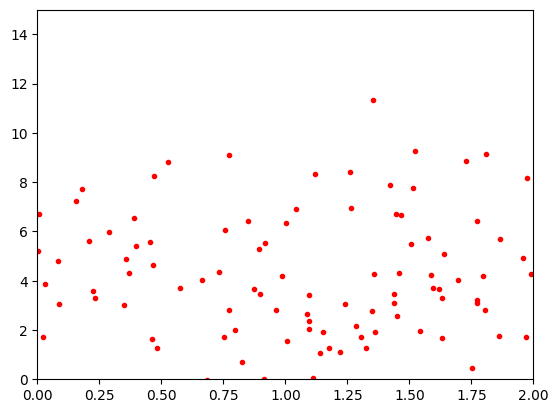

In [31]:
# Random linear dataset
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * np.random.randn(100, 1)
plt.axis([0, 2, 0, 15])
plt.plot(X, y, 'r.')

In [32]:
# finding parameters vector
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best


array([[3.99810797],
       [0.13529814]])

In [33]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.99810797],
       [4.26870425]])

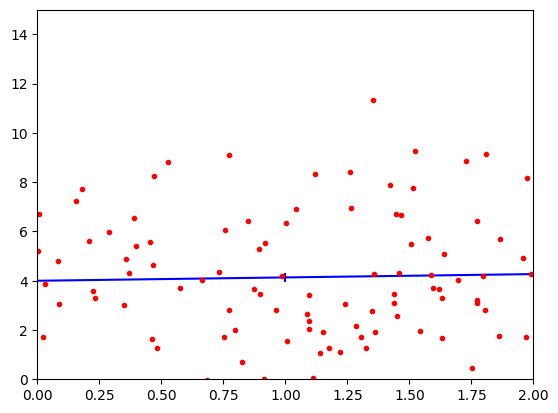

In [46]:
# Reviewing prediction line
plt.plot(X_new_b, y_predict, 'b-')
plt.plot(X, y, 'r.')
plt.axis([0, 2, 0, 15])
plt.show()

In [47]:
# Using sklearn model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.99810797]), array([[0.13529814]]))

In [35]:
lin_reg.predict(X_new)

array([[3.78854961],
       [3.17583743]])

In [36]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.99810797],
       [0.13529814]])

In [37]:
# Calculating pseuadoinverse
np.linalg.pinv(X_b).dot(y)

array([[3.99810797],
       [0.13529814]])

The pseudoinverse itself is computed using a standard matrix factorization
technique called Singular Value Decomposition (SVD) that can decompose
the training set matrix X into the matrix multiplication of three matrices U Σ
V (see numpy.linalg.svd()). The pseudoinverse is computed as
X+ = VΣ+U⊺. To compute the matrix Σ+, the algorithm takes Σ and sets
to zero all values smaller than a tiny threshold value, then it replaces all the
nonzero values with their inverse, and finally it transposes the resulting
matrix. This approach is more efficient than computing the Normal
Equation, plus it handles edge cases nicely: indeed, the Normal Equation
may not work if the matrix X X is not invertible (i.e., singular), such as if m
< n or if some features are redundant, but the pseudoinverse is always
defined.

### Computational Complexity

The Normal Equation computes the inverse of X X, which is an (n + 1) × (n + 1) matrix (where n is the number of features). The computational complexity of inverting such a matrix is typically about O(n2.4) to O(n3), depending on the implementation. In other words, if you double the number of features, you multiply the computation time by roughly 2 = 5.3 to 2 = 8.

The SVD approach used by Scikit-Learn’s LinearRegression class is about
O(n2). If you double the number of features, you multiply the computation
time by roughly 4.

*Both the Normal Equation and the SVD approach get very slow when the number of
features grows large (e.g., 100,000). On the positive side, both are linear with regard to
the number of instances in the training set (they are O(m)), so they handle large training
sets efficiently, provided they can fit in memory.*

## Gradient Descent

The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

it measures the local gradient of the error function with regard to the parameter vector θ, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum!

<img src="Images\image_1.png" alt="GS Illustration" width=450 height=250>

**One more thing that worth mentioning that we should determine the learning rate (step we make in iterations) since we may set it small which make the model take many iterations to converge, on the other hand if we set it large we may face a case of oscillations( the change is jumping on the valley sides and may not reach the bottom )**

Linear Regression has a convex shape function which made it easier for us to search the global minimum

Another thing to do is to make sure that all features has almost the same scale since having same scale will make it easier to reach the global minimum (Using *Scikit-learn StandardScalar*)

### Batch Gradient Descent

For Calculating GD we need to see (how much the cost function is effected by the model parameter a(i)), So we a partial drivative we be enough for that

<img src="Images\image_2.png" alt="GS Illustration" width=450 height=100>

An elegant handling for all model parameters we can make it a GD vector for all drivatives

<img src="Images\image_3.png" alt="GS Illustration" width=450 height=150>

**A good explaination for (Batch GD) why it named like this? -> is that the whole training set is passed to the algorithm in every step which can be considered a defect due to slowness resulted. However, Gradient Descent scales well with the number of features; training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation or SVD decomposition. Once**


After GD vector we determine that pieace of control we have (learning rate eta)

In [38]:
eta = 0.08 # Learning rate
n_iterations = 1000 # number of modification iterations
m = 100

In [39]:
theta = np.random.randn(2, 1) # random intialization

for iteration in range(n_iterations):
    gradients = 2/m * (X_b.T.dot(X_b.dot(theta) - y)) # Here we can see that it uses the whole dataset every time
    theta = theta - eta*gradients

In [40]:
theta

array([[3.99810797],
       [0.13529814]])

**Optimizing choosing of eta with GridSearch**

In [30]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)

# Define the parameter grid (learning rate)
param_grid = {
    'eta0': [0.001, 0.01, 0.1, 0.5, 1.0]  # Learning rates to try
}

# Set up GridSearchCV
grid_search = GridSearchCV(sgd_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit grid search
grid_search.fit(X_b, y.ravel())

# Print the best parameters and the corresponding mean squared error
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Since scoring is neg_mean_squared_error

print(f"Best parameters: {best_params}")
print(f"Best cross-validation MSE: {best_score}")


Best parameters: {'eta0': 0.1}
Best cross-validation MSE: 0.09097199765700512


### Stochastic Gradient Descent

A much faster and efficient method for calculating the global minimum. It doesn't need to use the whole dataset every step, it just uses a single random value from the data, and notice that (Stochastic GD can be implemented as an out-of-core algorithm)

this algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down. So once the algorithm stops, the final parameter values are good, but not optimal.

**Stochastic GD is very efficient when facing irregular cost function which we will help us escaping the trap of local minimum**

Using a static learning rate in SGD is not the most effective approach. Imagine walking down a staircase: at the beginning, you take large steps to descend quickly, but as you near the ground, you naturally slow down to avoid overshooting. Similarly, an adaptive learning rate allows for larger steps early in the optimization process and smaller, more precise steps as the solution approaches the minimum.

In [42]:
# SGD and passing data epoch by epoch
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradients
theta

array([[3.80954708],
       [0.15738272]])

In [45]:
# Using sklearn magic
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_ # pretty close to the minimum

(array([3.99466988]), array([0.1888977]))

**You may consider shuffling the dataset every epoch since you may end up taking same random indcies every time**

### Mini-batch Gradient Descent

Mini-batch Gradient Descent combines the strengths of both Stochastic Gradient Descent (SGD) and Batch Gradient Descent, striking a balance between performance and scalability.

In Mini-batch Gradient Descent, the dataset is divided into smaller groups of instances, or "mini-batches." This approach leverages the strengths of both Batch Gradient Descent and Stochastic Gradient Descent.

**Performance of three algorithms**

<img src="Images\image_4.png" alt="Comparing GD algorithms performance" width=350 height=200>

**All Linear Regression Algorithms**

<img src="Images\image_5.png" alt="Comparing GD algorithms performance" width=350 height=200>

**Finally, There is almost no difference after training: all these algorithms end up with very
similar models and make predictions in exactly the same way.**

## Polynomial Regression

What if your data is more complex than a straight line? Surprisingly, you can
use a linear model to fit nonlinear data. A simple way to do this is to add
powers of each feature as new features, then train a linear model on this
extended set of features. This technique is called Polynomial Regression

Text(0.5, 0, 'X')

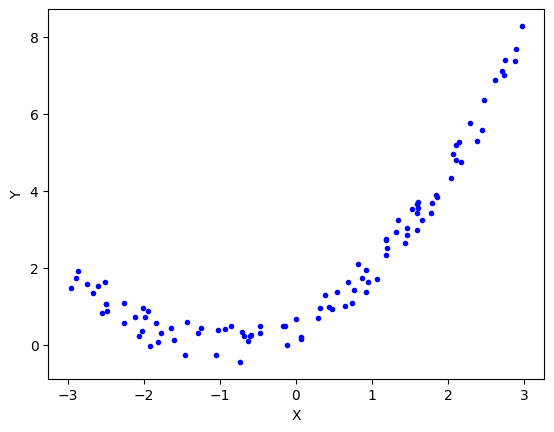

In [51]:
n = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + np.random.rand(m, 1)
plt.plot(X, y, 'b.')
plt.ylabel("Y")
plt.xlabel("X")

In [71]:
# Transform our training data, adding the square (second-degree polynomial) of each feature in the training set as a new feature 
# In this case there is just one feature
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([0.47422827]), array([0.47422827, 0.22489245]))

In [55]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([0.52411383]), array([[1.00128937, 0.50194211]]))

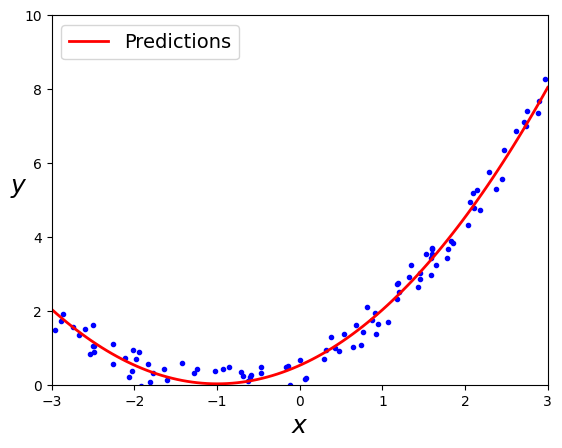

In [73]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1) # Generating data
X_new_poly = poly_features.transform(X_new) # poly features extraction
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

Curve fits pretty good which we can see also from the cofficients we have drived

## Learning Curves

Applying a 300-degree polynomial model to the preceding training data, and compares the result with a pure linear model and a quadratic model (second-degree polynomial). Notice how the 300-degree polynomial model wiggles around to get as close as possible to the training instances.

<img src="Images\image_6.png" alt="Learning Curves" width=400 height=200>

**We can see clearly that a high polynomial regression we lead to an Overfitting**

A good way to determine models performance to capture best approach of training before reaching overfitting and do not fall in underfitting is to plot their performance on train data and test data 

In [104]:
# review models performance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errs, val_errs = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errs.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errs.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errs), "r-", linewidth=2, label="Train")
    plt.plot(np.sqrt(val_errs), "b-", linewidth=3, label="Test")
    plt.ylabel("RMSE")
    plt.xlabel("Train test size")

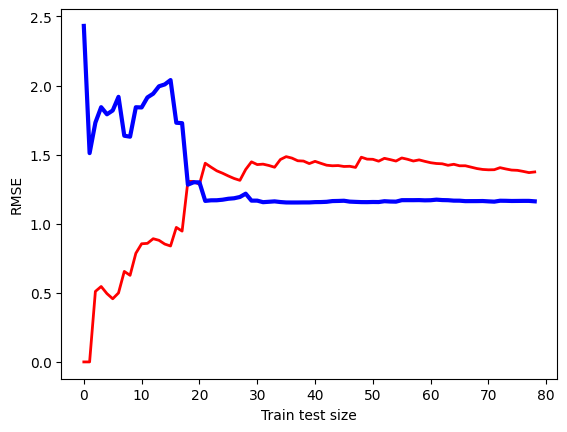

In [94]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)

**The training set error starts off quite low but increases as more instances are added, since the model struggles to fit all the data (think of it as being unable to please everyone). In the validation set, the error is initially high because the model lacks strong generalization capabilities. However, as more instances are added, the error gradually improves as the model gains a better understanding of the overall data distribution**

*If your model is underfitting the training data, adding more training examples will not
help. You need to use a more complex model or come up with better features.*

(np.float64(0.0), np.float64(80.0), np.float64(0.0), np.float64(3.0))

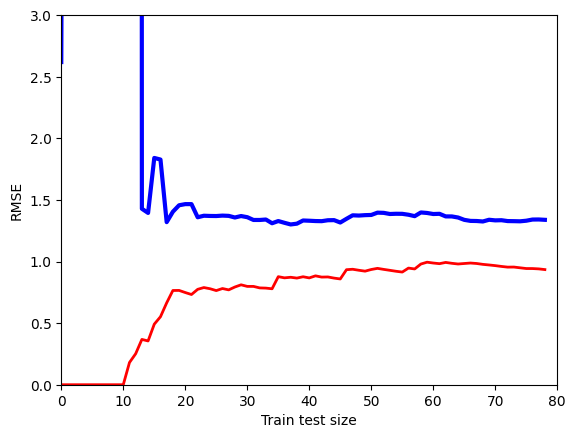

In [ ]:
# using 10th dgree polynomial regression
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline(
    [
        ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
        ('lin_reg', LinearRegression())
    ]
)
plot_learning_curve(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])

There is a gap between the curves. This means that the model
performs significantly better on the training data than on the
validation data, which is the hallmark of an overfitting model. If
you used a much larger training set, however, the two curves would
continue to get closer.

***TIP***

One way to improve an overfitting model is to feed it more training data until the
validation error reaches the training error.

**THE BIAS/VARIANCE TRADE-OFF**

Increasing a model’s complexity will typically increase its variance and
reduce its bias. Conversely, reducing a model’s complexity increases its
bias and reduces its variance. This is why it is called a trade-off.

## Regularized Linear Models

For a linear model, regularization is typically achieved by constraining the weights of the model. We will now look at Ridge Regression, Lasso Regression, and Elastic Net, which implement three different ways to constrain the weights.

### Ridge Regression

Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear Regression

Note that the regularization term should only be added to the cost function during training. Once the model is trained, you want to use the unregularized performance measure to evaluate the model’s performance.

A hyperparameter (Alpha) is associated to the regularization factor for adding a pieace of control that controls the slope of the line
* 0 -> Normal Linear Regression
* large -> flat line goes through data's mean

<img src="Images\image_7.png" alt="Regularzation equation" wight=300 height=100>

Note that the bias term θ0 is not regularized (the sum starts at i = 1, not 0n). If we define w as the vector of feature weights (θ1 to θn), then the regularization term is equal to ½(∥ w ∥ ) , where ∥ w ∥ represents the ℓ2 norm of the weight vector. For Gradient Descent, just add αw to the MSE gradient vector

**It is important to scale the data (e.g., using a StandardScaler) before performing
Ridge Regression, as it is sensitive to the scale of the input features. This is true of most
regularized models.**

In [129]:
# Ridge Regression using a closed-form solution

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.9538844]])

In [132]:
# Ridge Regression using Stochastic GD

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.93682453])

### Lasso Regression

Least Absolute Shrinkage and Selection Operator Regression (usually
simply called Lasso Regression) is another regularized version of Linear
Regression: just like Ridge Regression, it adds a regularization term to the
cost function, but it uses the ℓ norm of the weight vector instead of half the
square of the ℓ norm

---

# Break (Still working on the chapter and not finished)

---